In [2]:
import numpy as np
import pandas as pd
import sequence_scoring as seqs
import matplotlib.pyplot as plt

In [3]:
alpha_beta_seqs = pd.read_excel('data/ConservationScoringSequences.xlsx', 0)
human_seqs = pd.read_excel('data/ConservationScoringSequences.xlsx', 1)
imm_map = pd.read_excel('data/ImmunogenicityMap.xlsx')
imm_map = imm_map.rename(columns=lambda x: x.strip())

In [4]:
alpha_beta_seqs

,Relative,Species,Acquisition Number,ORF1AB,S,ORF3A,E,M,ORF6,ORF7A,ORF8,N,ORF10,Unnamed: 13
0,WH-Human 1|China|2019-Dec,Human,MN908947,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,MDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWL...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTE...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKFLVFLGIITTVAAFHQECSLQSCTQHQPYVVDDPCPIHFYSKWY...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,
1,Bat SARS coronavirus Rf1,Bat,DQ412042.1,MESLVLGVNEKTHVQLSLPVLQVSDVLVRGFGDTVEEALAEAREHL...,MKILIFAFLVTLVKAQEGCGVINLRTQPKLTQVSSSRRGVYYNDDI...,MDLFMSIFTLGSITRQPSKIENAFLASTVHATATIPLQASFSFRWL...,MYSFVSEETGTLIVNSVLLFVAFVVFLLVTLAILTALRLCAYCCNI...,MAENGTISVEELKRLLEQWNLVIGFLFLAWIMLLQFAYSNRNRLLY...,MFHLVDFQVTIAEILIIIMRTFRIAIWNLDVLISSIVRQLFKPLTK...,MKIILFLTLIALATCELYHYQECVRGTTVLLEEPCPSGTYEGNSPF...,MKFLIVMTCISLCCCIRTVVQRCASNTPYVLENPCPTGYQPEWNIR...,MSDNGPQNQCSAPRITFGGPSDSTDNNQDGGRSGARPKQRRPQGLP...,,
2,Bat SARS coronavirus Rm1,Bat,DQ412043.1,MESLVLGVNEKTHVQLSLPVLQVSDVLVRGFGDTVEEALAEAREHL...,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,MDLFMSIFTLGAITRQPAKVENASPASTVHATATIPLQASLPFGWL...,MYSFVSEETGTLIVNSVLLFFAFVVFLLVTLAILTALRLCAYCCNI...,MTDNGTITVEELKQLLEQWNLVIGFIFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMKTFRVAIWNLDILISSIVRQLFKPLTK...,MKIILFLTLIALASSELYHYQECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLIVFGLLTSVYCIHKECSIQECCENQPYQIEDPCPIHYYSDWF...,MSDNGPQNQRSAPRITFGGPSDSTDNNQDGGRSGARPKQRRPQGLP...,NaN,
3,Bat SARS coronavirus HKU3-2,Bat,DQ084199.1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MKILIFAFLANLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...,MDLFMSIFTLGAITRNPAKIENASPASTVHATATIPLQATFPFGWL...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MADNGTITVEELKQLLEQWNLVIGFIFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMKTFRVAIWNLDILISSIVRQLFKPLTK...,MKIILFLTLIALATCELYHYRECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLIVFGLLASVYCFHRECSIQECCENQPYQIEDPCPIHYYSDWF...,MSDNGPQSQRSAPRITFGGPADSNDNNQDGGRSGARPKQRRPQGLP...,,
4,Bat SARS coronavirus HKU3-3,Bat,DQ084200.1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MKILIFAFLANLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...,MDLFMSIFTLGAITRNPAKIENASPASTVHATATIPLQATFPFGWL...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MADNGTITVEELKQLLEQWNLVIGFIFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMKTFRVAIWNLDILISSIVRQLFKPLTK...,MKIILFLTLIALATCELYHYQECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLIVFGLLASVYCFHRECSIQECCENQPYQIEDPCPIHYYSDWF...,MSDNGPQSQRSAPRITFGGPADSNDNNQDGGRSGARPKQRRPQGLP...,,
5,Bat SARS coronavirus HKU3-1,Bat,DQ022305.2,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MKILIFAFLANLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...,MDLFMSIFTLGAITRNPAKIENASPASTVHATATIPLQATFPFGWL...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MADNGTITVEELKQLLEQWNLVIGFIFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMKTFRVAIWNLDILISSIVRQLFKPLTK...,MKIILFLTLIALATCELYHYQECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLIVFGLLASVYCFHRECSIQECCENQPYQIEDPCPIHYYSDWF...,MSDNGPQSQRSAPRITFGGPADSNDNNQDGGRSGARPKQRRPQGLP...,,
6,Bat SARS coronavirus Rp3,Bat,DQ071615.1,MESLVLGINEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MKILILAFLASLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...,MDLFMSIFTLGAITRQPAKIENASPASTVHATATIPLQASLPFGWL...,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...,MAENGTISVEELKRLLEQWNLVIGFIFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMKTFRVAIWNLDILISSIVRQLFKPLTK...,MKIILFLTLIALASCELYHYQECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLIVFGLLTSVYCIHKECSIQECCENQPYQIEDPCPIHYYSDWF...,MSDNGPQNQRSAPRITFGGPTDSTDNNQDGGRSGARPKQRRPQGLP...,NaN,
7,SARS coronaivrus GD01,Human,AY278489.2,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,MDLFMRFFTLGSITAQPVKIDNASPASTVHATATIPLQASLPFGWL...,MYSFVSEETGTLIVNSVLLFLAFMVFLLVTLAILTALRLCAYCCNI...,MADNGTITVEELKQLLEQWNLVIGFLFLAWIMLLQFAYSNRNRFLY...,MFHLVDFQVTIAEILIIIMRTFRIAIWNLDVIISSIVRQLFKPLTK...,MKIILFLTLIVFTSCELYHYQECVRGTTVLLKEPCPSGTYEGNSPF...,MKLLI

In [5]:
human_seqs

,Species,Gene,AcqNum,Sequence
0,Human,S,>YP_009724390/1-1273 |surface glycoprotein [Wu...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
1,Human,S,>QIK02944/1-1273 |surface glycoprotein [Severe...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
2,Human,S,>QIK02954/1-1273 |surface glycoprotein [Severe...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
3,Human,S,>QIK02964/1-1273 |surface glycoprotein [Severe...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
4,Human,S,>QIJ96463/1-1273 |surface glycoprotein [Severe...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
...,...,...,...,...
537,Human,E,>QHO62879,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...
538,Human,E,>QHO60596,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...
539,Human,E,>QHN73797,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...
540,Human,E,>QHN73812,MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...


In [6]:
imm_map.columns

Index(['Unnamed: 0', 'HLA.A0101', 'HLA.A0201', 'HLA.A0202', 'HLA.A0203',
       'HLA.A0205', 'HLA.A0206', 'HLA.A0207', 'HLA.A0211', 'HLA.A0212',
       ...
       'Class II Alleles Bound', 'ClassII Binding Alleles', 'ID', '33mer',
       'Dissimilarity Score 33mer', 'Conservation Score 33mer',
       'T Cell Combined Score', 'B cell Linear 33mer',
       'B cell Conformational 33mer', 'B and T cell Total'],
      dtype='object', length=139)

In [7]:
list_33mers = pd.DataFrame({"ID": imm_map["ID"], "33mer": imm_map["33mer"], "actual_score": imm_map["Conservation Score 33mer"]})
list_33mers

,ID,33mer,actual_score
0,S_1205,KYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCM,0.817933
1,S_1201,QELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIM,0.820526
2,S_1204,GKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCC,0.817933
3,S_1202,ELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIML,0.820944
4,S_1203,LGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLC,0.817515
...,...,...,...
9616,ORF10_30,V,0.006452
9617,ORF6_53,D,0.006452
9618,ORF3a_267,P,0.004779
9619,N_411,M,0.002151


In [8]:
def cons_score(seqs, this_mer, start_idx):
    score_sum = 0
    for i in range(len(this_mer)):
        matches = 0
        for seq in seqs:
            if (seq[i + start_idx] == this_mer[i]):
                matches += 1
        percent = matches/len(seqs)
        score_sum += percent
    return score_sum


In [9]:
proteins = ["E", "M", "N", "ORF10", "ORF1AB", "ORF3A", "ORF6", "ORF7A",
           "ORF8", "S"]
aligned_sequences = {}
for p in proteins:
    ab = seqs.input_aligned_sequences("data/alpha_beta_" + p + "_output.txt")
    aligned_sequences["ab-" + p.lower()] = ab
    human = seqs.input_aligned_sequences("data/Human_" + p + "_output.txt")
    aligned_sequences["human-" + p.lower()] = human
print(aligned_sequences.keys())

dict_keys(['ab-e', 'human-e', 'ab-m', 'human-m', 'ab-n', 'human-n', 'ab-orf10', 'human-orf10', 'ab-orf1ab', 'human-orf1ab', 'ab-orf3a', 'human-orf3a', 'ab-orf6', 'human-orf6', 'ab-orf7a', 'human-orf7a', 'ab-orf8', 'human-orf8', 'ab-s', 'human-s'])


In [10]:
def split_protein_from_name(row):
    return row["ID"].split('_')[0]

def split_index_from_name(row):
    return int(row["ID"].split('_')[1]) - 1

list_33mers["protein"] = list_33mers.apply(split_protein_from_name, 1)
list_33mers["index"] = list_33mers.apply(split_index_from_name, 1)

In [11]:
def init_score_ab(row):
    seqs = aligned_sequences["ab-" + row["protein"].lower()]
    return cons_score(seqs, row["33mer"], row["index"])

def init_score_human(row):
    seqs = aligned_sequences["human-" + row["protein"].lower()]
    return cons_score(seqs, row["33mer"], row["index"])

list_33mers["ab_init_score"] = list_33mers.apply(init_score_ab, 1)
list_33mers["human_init_score"] = list_33mers.apply(init_score_human, 1)
list_33mers

,ID,33mer,actual_score,protein,index,ab_init_score,human_init_score
0,S_1205,KYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCM,0.817933,S,1204,3.2,33.0
1,S_1201,QELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIM,0.820526,S,1200,4.2,33.0
2,S_1204,GKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCC,0.817933,S,1203,3.2,33.0
3,S_1202,ELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIML,0.820944,S,1201,4.2,33.0
4,S_1203,LGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLC,0.817515,S,1202,4.2,33.0
...,...,...,...,...,...,...,...
9616,ORF10_30,V,0.006452,ORF10,29,0.0,1.0
9617,ORF6_53,D,0.006452,ORF6,52,1.0,1.0
9618,ORF3a_267,P,0.004779,ORF3a,266,0.0,0.0
9619,N_411,M,0.002151,N,410,0.0,1.0


In [12]:
ab_max = np.max(list_33mers["ab_init_score"])
ab_min = np.min(list_33mers["ab_init_score"])
list_33mers["ab_score"] = (list_33mers["ab_init_score"] - ab_min) / (ab_max - ab_min)
human_max = np.max(list_33mers["human_init_score"])
human_min = np.min(list_33mers["human_init_score"])
list_33mers["human_score"] = (list_33mers["human_init_score"] - human_min) / (human_max - human_min)
list_33mers["final_score"] = (list_33mers["ab_score"]+list_33mers["human_score"]) / 2
list_33mers

,ID,33mer,actual_score,protein,index,ab_init_score,human_init_score,ab_score,human_score,final_score
0,S_1205,KYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCM,0.817933,S,1204,3.2,33.0,0.10000,1.000000,0.550000
1,S_1201,QELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIM,0.820526,S,1200,4.2,33.0,0.13125,1.000000,0.565625
2,S_1204,GKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCC,0.817933,S,1203,3.2,33.0,0.10000,1.000000,0.550000
3,S_1202,ELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIML,0.820944,S,1201,4.2,33.0,0.13125,1.000000,0.565625
4,S_1203,LGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLC,0.817515,S,1202,4.2,33.0,0.13125,1.000000,0.565625
...,...,...,...,...,...,...,...,...,...,...
9616,ORF10_30,V,0.006452,ORF10,29,0.0,1.0,0.00000,0.030303,0.015152
9617,ORF6_53,D,0.006452,ORF6,52,1.0,1.0,0.03125,0.030303,0.030777
9618,ORF3a_267,P,0.004779,ORF3a,266,0.0,0.0,0.00000,0.000000,0.000000
9619,N_411,M,0.002151,N,410,0.0,1.0,0.00000,0.030303,0.015152


In [13]:
ab_maxes = list_33mers.groupby("protein").max()[["ab_init_score"]]
ab_mins = list_33mers.groupby("protein").min()[["ab_init_score"]]
human_maxes = list_33mers.groupby("protein").max()[["human_init_score"]]
human_mins = list_33mers.groupby("protein").min()[["human_init_score"]]

def ab_normalization(row):
    p = row["protein"]
    ab_max = ab_maxes.loc[p]
    ab_min = ab_mins.loc[p]
    return (row["ab_init_score"] - ab_min)/(ab_max-ab_min)

def human_normalization(row):
    p = row["protein"]
    human_max = human_maxes.loc[p]
    human_min = human_mins.loc[p]
    return (row["human_init_score"] - human_min)/(human_max - human_min)

list_33mers["ab_score"] = list_33mers.apply(ab_normalization, 1)
list_33mers["human_score"] = list_33mers.apply(human_normalization, 1)
list_33mers["final_score"] = (list_33mers["ab_score"] + list_33mers["human_score"]) / 2
list_33mers

,ID,33mer,actual_score,protein,index,ab_init_score,human_init_score,ab_score,human_score,final_score
0,S_1205,KYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCM,0.817933,S,1204,3.2,33.0,0.560976,1.0,0.780488
1,S_1201,QELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIM,0.820526,S,1200,4.2,33.0,0.743902,1.0,0.871951
2,S_1204,GKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCC,0.817933,S,1203,3.2,33.0,0.560976,1.0,0.780488
3,S_1202,ELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIML,0.820944,S,1201,4.2,33.0,0.743902,1.0,0.871951
4,S_1203,LGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLC,0.817515,S,1202,4.2,33.0,0.743902,1.0,0.871951
...,...,...,...,...,...,...,...,...,...,...
9616,ORF10_30,V,0.006452,ORF10,29,0.0,1.0,0.000000,0.0,0.000000
9617,ORF6_53,D,0.006452,ORF6,52,1.0,1.0,0.000000,0.0,0.000000
9618,ORF3a_267,P,0.004779,ORF3a,266,0.0,0.0,0.000000,0.0,0.000000
9619,N_411,M,0.002151,N,410,0.0,1.0,0.000000,0.0,0.000000


(array([  40.,   35.,   38.,   38.,   34.,   35.,   40.,  665., 1264.,
        7432.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

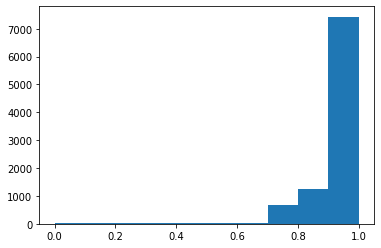

In [25]:
plt.hist(list_33mers["actual_score"])

(array([ 157.,   45.,   47.,   58.,   89., 3266., 3179., 1784.,  703.,
         293.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

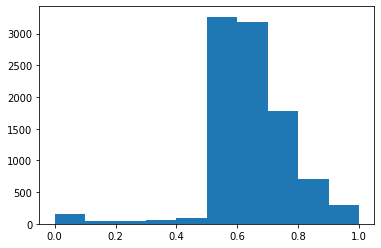

In [29]:
plt.hist(list_33mers["final_score"], label="hist_final_score")

<BarContainer object of 9621 artists>

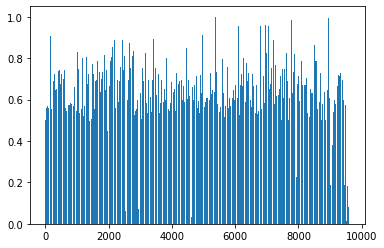

In [28]:
plt.bar(list_33mers.index, list_33mers["final_score"], label="bar_plot")